In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from naolib_producer import main

main()

In [10]:
from datetime import datetime
from kafka import KafkaConsumer
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Kafka configuration
kafka_config = {
    "bootstrap_servers": "kafka1:9092",
}
KAFKA_TOPIC = "bus_affluence_horaire"

# Initialiser le consommateur Kafka
consumer = KafkaConsumer(
    KAFKA_TOPIC,
    bootstrap_servers=kafka_config["bootstrap_servers"],
    auto_offset_reset="earliest",
    value_deserializer=lambda v: json.loads(v.decode("utf-8")),
)

bus_counts = defaultdict(int)

def parse_bus_time(hour_str, minute_str):
    """Parsing API time to be treated efficiently"""
    try:
        hour = int(hour_str.replace("h", ""))  # Convert '4h' → 4
        minute = int(minute_str.rstrip("v"))  # Convert "15" → 15
        normalized_hour = hour % 24
        return datetime.utcnow().replace(hour=normalized_hour, minute=minute, second=0, microsecond=0)
    except ValueError:
        print(f"Invalid time format: {hour_str}:{minute_str}")
        return None
    
def update_plot():
    """Method to plot the results"""
    if not bus_counts:
        print("⚠️ No data available for visualization.")
        return

    df = pd.DataFrame(bus_counts.items(), columns=["Heure", "Nombre de bus"])
    df.sort_values("Heure", inplace=True)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="Heure", y="Nombre de bus", palette="viridis")
    plt.xlabel("Heure de la journée")
    plt.ylabel("Nombre total de bus")
    plt.title("Affluence des bus par heure")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def main():
    print("Listening for bus affluence data...")

    for i,message in enumerate(consumer):
        try:
            data = message.value
            ligne = data.get("numLigne", "Unknown Line")
            stop = data.get("stop", "Unknown Stop")
            heure = data.get("heure")
            passage = data.get("passage")

            # Convert time to datetime object
            bus_time = parse_bus_time(heure, passage)
            if bus_time:
                hour_str = bus_time.strftime("%H:00")  # Convert to "HH:00" format
                bus_counts[hour_str] += 1

                print(f"🚌 Bus on Line {ligne} at {stop} scheduled at {bus_time}")

                # Display updated bus counts
                print("\n📊 Bus Count Per Hour:")
                for hour, count in sorted(bus_counts.items()):
                    print(f"  ⏰ {hour}: {count} bus(es)")

        except json.JSONDecodeError:
            print("❌ Error decoding Kafka message")
    
    update_plot()

main()


INFO:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.3.dev, node_id=bootstrap-0 host=kafka1:9092 <connecting> [IPv4 ('172.19.0.7', 9092)]>: connecting to kafka1:9092 [('172.19.0.7', 9092) IPv4]
INFO:kafka.conn:Broker version identified as 2.6
INFO:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.3.dev, node_id=bootstrap-0 host=kafka1:9092 <checking_api_versions_recv> [IPv4 ('172.19.0.7', 9092)]>: Connection complete.
INFO:kafka.consumer.subscription_state:Updating subscribed topics to: ('bus_affluence_horaire',)
INFO:kafka.consumer.subscription_state:Updated partition assignment: [TopicPartition(topic='bus_affluence_horaire', partition=0)]
INFO:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.3.dev, node_id=1 host=9a6bb52098ec:9092 <connecting> [IPv4 ('172.19.0.7', 9092)]>: connecting to 9a6bb52098ec:9092 [('172.19.0.7', 9092) IPv4]
INFO:kafka.conn:<BrokerConnection client_id=kafka-python-2.1.3.dev, node_id=1 host=9a6bb52098ec:9092 <checking_api_versions_send> [IP

Listening for bus affluence data...
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 06:01:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 1 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 06:22:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 2 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 06:43:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 07:02:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
  ⏰ 07:00: 1 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 07:15:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
  ⏰ 07:00: 2 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 07:28:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
  ⏰ 07:00: 3 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 07:40:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
  ⏰ 07:00: 4 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled at 2025-03-25 07:47:00

📊 Bus Count Per Hour:
  ⏰ 06:00: 3 bus(es)
  ⏰ 07:00: 5 bus(es)
🚌 Bus on Line 23 at CRQU4 scheduled

KeyboardInterrupt: 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_527/4222127323.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Heure", y="Nombre de bus", palette="viridis")
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


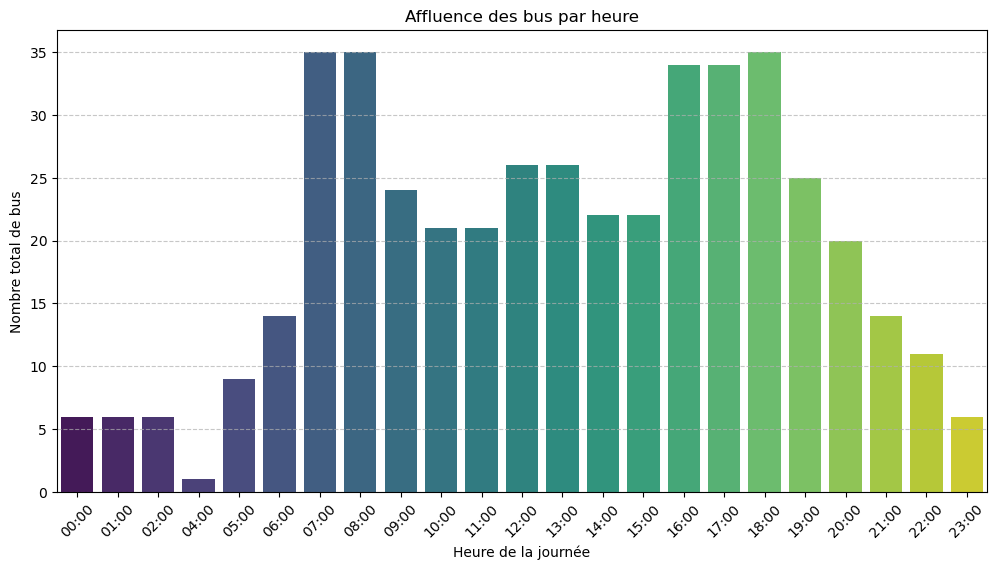

In [11]:
update_plot()

/opt/conda/lib/python3.12/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
25/03/25 14:15:55 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.
/tmp/ipykernel_334/1337699853.py:85: FutureWarning:                             

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bus_counts_df, x="hour", y="bus_count", palette="viridis")


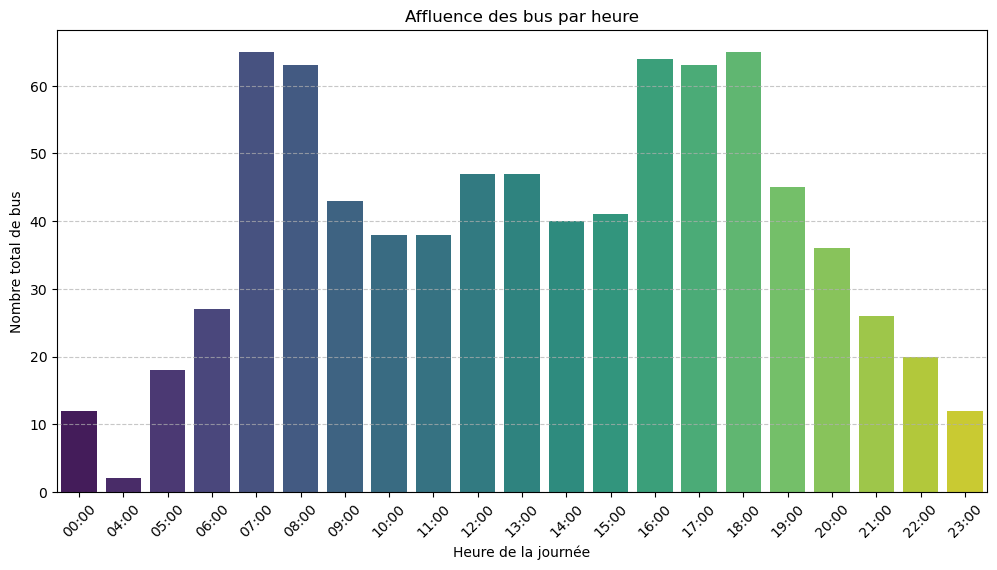

In [13]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import col, from_json, explode, udf
from pyspark.sql.types import StructType, StructField, StringType, ArrayType
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_spark_session():
    conf = SparkConf() \
        .setAppName("SparkApp") \
        .setMaster("spark://spark:7077") \
        .set("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.3.4,org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.3") \
        .set("spark.sql.shuffle.partitions", "10")
    
    sc = SparkContext.getOrCreate(conf=conf)
    sql_context = SQLContext(sc)
    spark = SparkSession(sc)
    return spark

spark=create_spark_session()

kafka_config = {
    "bootstrap_servers": "kafka1:9092",
}
KAFKA_TOPIC = "bus_affluence_horaire"

# Define schema
schema = StructType([
    StructField("numLigne", StringType(), True),
    StructField("stop", StringType(), True),
    StructField("heure", StringType(), True),
    StructField("passage", StringType(), True) 
])

# Read batch data from Kafka
df = spark.read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "kafka1:9092") \
    .option("subscribe", KAFKA_TOPIC) \
    .option("startingOffsets", "earliest") \
    .option("endingOffsets", "latest") \
    .load()

# Convert Kafka message value from binary to JSON
df_parsed = df.select(from_json(col("value").cast("string"), schema).alias("data")).select("data.*")

# Define UDF to normalize hours and parse bus times
def parse_bus_time(hour_str, passages):
    try:
        hour = int(hour_str.replace("h", ""))
        normalized_hour = hour % 24  # Convert 24h → 00h, 25h → 01h

        bus_times = []
        if passages: 
            for passage in passages:
                minute = int(passage.rstrip("v"))  
                bus_time = datetime.utcnow().replace(hour=normalized_hour, minute=minute, second=0, microsecond=0)

                bus_times.append(bus_time.strftime("%H:00")) 

        return bus_times
    except ValueError:
        return []

# Register UDF
parse_time_udf = udf(parse_bus_time, ArrayType(StringType()))

# Apply time normalization
df_transformed = df_parsed.withColumn("parsed_times", parse_time_udf(col("heure"), col("passage")))

# Explode array so each passage time becomes a separate row
df_exploded = df_transformed.selectExpr("numLigne", "stop", "explode(parsed_times) as hour")

# Aggregate bus counts per hour
df_aggregated = df_exploded.groupBy("hour").count().withColumnRenamed("count", "bus_count")


# Convert to Pandas for plotting
bus_counts_df = df_aggregated.toPandas().sort_values("hour")

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(data=bus_counts_df, x="hour", y="bus_count", palette="viridis")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre total de bus")
plt.title("Affluence des bus par heure")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [14]:
spark.stop()